# 引入

本文档在快速上手文档的基础上，对 SymPy 库中各个模块的使用进行进一步的介绍

首先是 SymPy 模块的引入，有两种方式可以选择

为了简洁，下面将采用 `from sympy import *` 的方式，省略方法前面的 sympy.

In [1]:
import sympy
from sympy import *

在使用 SymPy 前，建议用 `init_printing` 来进行输出的初始化

该方法会根据当前的系统来自动选择数学符号的输出方式

SymPy 对 IPython Notebook 有较好的输出适配，可以搭配 `display` 进行打印

In [2]:
init_printing()
from IPython.display import display

以 $\int \pi dx$ 为例

`print` 只能以普通字符方式来打印结果，无法展示特殊符号

`sympy.pprint` 会以 Unicode 字符的方式打印，相比 print 更直观

`IPython.display.display` 则会以更美观的方式打印公式，最适合阅读

In [3]:
x = Symbol('x')

print(Integral(pi, x))
pprint(Integral(pi, x))
display(Integral(pi, x))

Integral(pi, x)
⌠     
⎮ π dx
⌡     


# 符号

## 基本符号

使用 `symbols` 引入基本的英文字母和希腊字母

由于 `lambda` 函数是 Python 的保留字，因此引入希腊字母 $\lambda$ 需要使用 `lamda`

In [3]:
a, b, x, y = symbols('a b x y')
alpha, beta, lamda = symbols('alpha beta lamda')

变量与符号按照声明顺序一一对应，变量名和符号名可以不一致

例如将 symC 声明为符号 d，将 symD 声明为符号 c

也可以用多个字母作为一个符号名

In [5]:
symC, symD, KFC = symbols('d c vMe50')
display(symC, symD, KFC)

需要注意，表达式中使用的是符号本身，与变量无关

如果赋值 x = 2，则变量 x 变成了 int 类型，而不是符号 x

变量 x 的改变不会影响表达式中的符号 x

In [6]:
x = symbols('x')
expr = x + 1

display(type(x))
x = 2
display(type(x))
display(expr)
display(type(expr))

sympy.core.symbol.Symbol

int

sympy.core.add.Add

## 特殊符号

在 SymPy 的符号系统中有一些特殊符号可以直接使用，这里举一些常用的例子

| 符号     | 示意 |
| -------- | ---- |
| sympy.I  | $i$  |
| sympy.E  | $e$  |
| sympy.oo | ∞    |
| sympy.pi | $π$  |

In [8]:
display([E,I,pi,oo])

## 数组、上下标

SymPy 还支持创建符号的数组，只需在数字处指定范围即可

取某个元素时按照下标来选择

In [8]:
a = symbols('a_0:5')
display(a)
display(a[1])

使用 `_` 和 `^` 为符号添加上下标

In [9]:
symbols('x_0:3^(i)')

## 指定范围

符号能够指定取值范围，满足不同表达式和计算的要求

常用的有正数、实数、整数、非零四种指定类型

In [10]:
symbols('x', positive = True)
symbols('y', real = True)
symbols('a', integer = True)
symbols('b', nonzero = True)

## 符号替换

`subs` 将符号替换为其他符号、表达式或数值

`subs(*args, **kwargs)`

- `*args` 替换的表达式，可以使用 `old, new` 或 `{old:new, old:new}` 或 `[(old,new), (old,new)]` 等形式
    
替换的 old 可以是符号或者表达式，new 可以是符号、表达式或者数值

In [11]:
x, y = symbols('x y')
expr = 1 + x*y
display(expr)
display(expr.subs(x, pi))
display(expr.subs({x:pi, y:2}))
display(expr.subs([(x, pi), (y, 2)]))

In [12]:
a, b, x, y = symbols('a b x y')

# 表达式

## 通用化简和输出方法

SymPy 提供了对各类型通用的 `simplify` 方法，能够将表达式进行自动化简

In [13]:
display(sin(x)**2 + cos(x)**2)
display(simplify(sin(x)**2 + cos(x)**2))

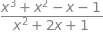

In [14]:
display((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))
display(simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))

另外，可以使用 `latex` 方法，将输出转化成 Latex 数学公式格式，方便导入文档中

In [15]:
print('$'+latex(x**2 + 2*x + sin(x)**2)+'$')

$x^{2} + 2 x + \sin^{2}{\left(x \right)}$


将输出的 Latex 格式复制到文档中即可显示

$x^{2} + 2 x + \sin^{2}{\left(x \right)}$

`simplify` 会自动地选择合适的形式，但它的缺点第一是速度较慢，第二是我们无法指定化简的形式，例如多项式的因式分解等

因此对于每一种表达式我们可以使用具体的变形方法

## 多项式/有理函数

SymPy 支持整式和分式的多种操作。下面就先从多项式开始介绍，然后再介绍分式

直接声明一个表达式变量名并赋值，等号的右边直接书写表达式，其中幂以 `**` 书写，而非 `^`

也可以在方法中直接书写表达式，而不需要命名变量

In [16]:
x, y, z = symbols('x y z')
expr = (x + 1)**2
expr

### 展开

`expand` 展开表达式

In [17]:
expand(expr)

### 因式分解
`factor` 进行因式分解

In [18]:
display(x**3 - x**2 + x -1)
display(factor(x**3 - x**2 + x -1))

### 指定符号的幂

`collect` 将表达式整理成指定符号的幂的形式，对于多变量的表达式很有用

`collect(expr, syms, func=None, evaluate=None, ...)`
- `expr` 进行整理的表达式
- `syms` 指定的符号，使用 [x, y] 的形式指定多个符号，按顺序进行整理
- `evaluate` None/True: 返回表达式形式，False: 返回字典形式

In [19]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
display(expr)
display(collect(expr, x))
display(collect(expr, x, evaluate=False))

`coeff` 提取相应变量或表达式的幂的系数

In [20]:
display(expr.coeff(x, 2))
display(expr.coeff(y, 1))

### 分式标准化

接下来介绍分式相关的操作

`cancel` 将有理函数整理成 p/q 的标准形式，并且约去分子分母的公因子

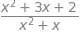

In [21]:
display((x**2 + 3*x + 2)/(x**2 + x))
display(cancel((x**2 + 3*x + 2)/(x**2 + x)))

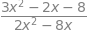

In [22]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
display(expr)
display(cancel(expr))

### 分式分解

对于分式也能使用 `factor`，将表达式进行因式分解

In [23]:
display(factor(expr))

`apart` 按照分母的因式将表达式进行分解

In [24]:
display(apart(expr))

## 三角函数

SymPy 支持三角函数和反三角函数，反三角函数只需要在前面加上 a 即可

除此以外还支持双曲函数

In [25]:
display(cos(x), acos(x), sin(pi/2), asin(1))
display(sinh(x), tanh(x))

`trigsimp` 化简三角函数，智能选择合适的形式

与 `simplify` 类似，但是速度上会更快

In [26]:
display(sin(x)*tan(x)/sec(x))
display(trigsimp(sin(x)*tan(x)/sec(x)))

In [27]:
display(cosh(x)**2 + sinh(x)**2)
display(trigsimp(cosh(x)**2 + sinh(x)**2))

`expand_trig` 展开三角函数，在括号中保留单个符号的一次幂形式

In [28]:
display(sin(x+y))
display(expand_trig(sin(x+y)))

## 幂函数和指数函数

对于指数的化简有三种情况

1. $x^ax^b=x^{a+b}$，恒成立

2. $x^ay^a=(xy)^a$，仅限于 $x,y\ge 0,a\in R$，如 $(-1)^{1/2}(-1)^{1/2}\ne (-1\times -1)^{1/2}$

3. $(x^a)^b=x^{ab}$，仅限于 $b\in Z$，如 $((-1)^2)^{1/2}\ne(-1)^{2\times 1/2}$

因此对于指数表达式，我们需要用到之前提到的指定符号的范围

In [29]:
x, y, z = symbols('x y z', positive=True)
x2, y2 = symbols('x y')
a, b = symbols('a b', real=True)

`powsimp` 化简指数表达式，智能选择合适的形式

同样与 `simplify` 类似

In [30]:
display(x**a*x**b + x**z*y**z)
display(powsimp(x**a*x**b + x**z*y**z))

但是如果符号范围不成立，则无法进行化简（这里的 x2,y2 没有指定非负，不符合第 2 条变形）

In [31]:
display(powsimp(x2**a*y2**a))

指数有两种展开方式

`expand_power_exp` 对次数进行展开，对应第 1 条变形的逆

In [32]:
display(x**(a+b))
display(expand_power_exp(x**(a+b)))

`expand_power_base` 对基底进行展开，对应第 2 条变形的逆

In [33]:
display((x*y)**a)
display(expand_power_base((x*y)**a))

`powdenest` 对幂次数进行合并，对应第 3 条变形

但是在 JupyterLab 的测试里第 3 条变形会自动应用，因此不需要额外使用 `powdenest` 方法

In [34]:
powdenest((x**a)**b)

## 对数函数

对数的化简有两种形式

1. $\log(xy)=\log(x)+\log(y)$

2. $\log(x^n)=n\log(x)$

对于两条变形，都需要 $x,y\ge 0,n\in R$，因此同样需要指定符号的范围

In [35]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

对数表达式没有类似 `simplify` 的默认化简方法，只有 `expand_log` 和 `logcombine` 两种方法

`expand_log`，对表达式进行展开，log 符号里只保留单个符号的一次项

对应第 1 条和第 2 条变形从左到右应用

In [36]:
display(log(x**2 * y))
display(expand_log(log(x**2 * y)))

`logcombine`，对表达式进行合并，对应第 1 条和第 2 条变形的逆

In [37]:
display(n * log(x) + log(y**2))
display(logcombine(n * log(x) + log(y**2)))

In [38]:
a, b, x, y = symbols('a b x y')

## 特殊函数

除了各种表达式以外，还有一些特殊的函数

首先是阶乘 `factorial`

In [39]:
n, k = symbols('n k',integer=True)
display(factorial(n))
display(simplify(factorial(n)/(n*(n-1))))
display(factorial(n).subs(n,3))

然后是二项式 `binomial`

使用 `expand_func` 将函数进行展开

In [40]:
display(binomial(n, k))
display(expand_func(binomial(n, 3)))

除此以外还有 $\Gamma$ 函数、排列组合等特殊函数，这里不做过多展开

参见：
https://docs.sympy.org/latest/modules/functions/index.html#functions-contents

# 计算

## 求和、求积

`summation(f, *symbols, **kwargs)`:
- `f` 求和表达式
- `*symbols` 迭代求值的符号和取值范围, e.g.$(i, a, b)$
- `**kwargs` 符号的取值范围，进行双重求和

如果不能直接得出解，则返回求和表达式

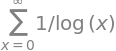

In [41]:
f = 1 / log(x)
summation(f, (x, 0, oo))

一般的求和情况

In [42]:
fx = 2**x
display(fx)
display(summation(fx, (x, 1, 3)))

使用双重范围进行求和的情况

In [43]:
display(summation(fx, (x, 1, a)))
display(summation(fx, (x, 1, a),(a, 2, 3)))

`product(f, *symbols, **kwargs)`:
- `f` 表达式
- `*symbols` 迭代求积的符号和取值范围, e.g.$(i, a, b)$
- `**kwargs` 指定符号的取值范围，进行双重求积

如果不能直接得出解，则返回求积表达式

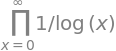

In [44]:
fx = 1 / log(x)
product(fx, (x, 0, oo))

一般的求积情况

In [45]:
fx = x
display(fx)
display(product(fx, (x, 1, 3)))

使用双重范围进行求积的情况

In [46]:
display(product(fx, (x, 1, a)))
display(product(fx, (x, 1, a), (a, 2, 3)))

## 极限

`Limit` 列出极限式，再使用 `doit` 进行求解

`limit` 直接计算极限

`limit(expr, z, z0, dir='+')`
- `expr` 表达式
- `z` 指定的变量
- `z0` 指定变量的趋向值
- `dir` '+'取右极限，'-'取左极限，'+-'两边极限

In [47]:
display(Limit(sin(x)/x, x, 0, dir='+-'))
display(Limit(sin(x)/x, x, 0, dir='+-').doit())

极限方向默认取右极限，需要使用 `dir` 指定

如果遇到左右极限不相等的情况，第一种可能是使用复数无穷大 `zoo` $\tilde\infty$ 来表示

In [48]:
display(limit(1/x, x, 0))
display(limit(1/x, x, 0, dir='-'))
display(limit(1/x, x, 0, dir='+-'))

第二种可能是直接进行报错

In [49]:
display(limit(E**(1/x), x, 0, '+'))
display(limit(E**(1/x), x, 0, '-'))

In [50]:
display(limit(E**(1/x), x, 0, '+-'))

ValueError: The limit does not exist since left hand limit = 0 and right hand limit = oo

## 微分

`Derivative` 列出微分式，再使用 `doit` 求解

`diff` 直接进行求导

`diff(expr, *symbols, **kwargs)`
- `expr` 表达式
- `symbols` 进行求导的符号
- `kwargs` 求导阶数, 默认为1

首先是进行简单求导的情况

In [51]:
display(Derivative(x**3, x))
display(Derivative(x**3, x).doit())

In [52]:
diff(x**3, x)

除了指定单个符号，使用 `x, x, ...` 或者 `x, 3, ...` 的形式进行多阶求导

In [53]:
display(diff(x**3, x, x))
display(diff(x**3, x, 3))

如果需要求导的表达式是多元表达式，则可以按符号顺序求导数

In [54]:
display(Derivative(x**2*y**3, x, y))
display(diff(x**2*y**3, x, y))
display(diff(x**2*y**3, y, 2))

## 积分

`Integral` 列出积分式, 使用 `doit` 进行求解

`integrate` 直接计算积分

`transform` 积分的变量替换

`integrate(exp, symbol)`
- `exp` 被积函数
- `symbol` 待积分的符号
  1. 只传入符号，此时求的是不定积分
  2. 传入一个元祖，但只指定了符号的积分下限，比如 (x, a)，此时求不定积分后，会将结果中的x用a替换，不常用
  3. 传入一个元祖，同时指定了符号的积分上下限，比如 (x, a, b), 此时求的是定积分
  4. 传入多个元祖，此时求的是多重积分

首先使用 `Integral` 展示积分的列式和计算

In [55]:
display(Integral(log(x)**2 + y, x))
display(Integral(log(x)**2 + y, x).doit())

使用 `integrate` 展示不定积分、符号替换、定积分等计算情况

In [56]:
display(integrate(x**2, x))
display(integrate(x**2, (x, a)))
display(integrate(x**2, (x, 1, 3)))

多重积分的情况

In [57]:
display(Integral(2*x + y, x, y))
display(integrate(2*x + y, x, y))
display(integrate(2*x + y, (x,1,3), (y,2,4)))

`transform(x, u)`
- `x` 替换前的变量/表达式
- `u` 替换后的变量/表达式

如果 x 是一个符号，u 是一个函数，则将 x 替换成 $f(x)$

如果 u 是一个符号，x 是一个函数，则将 x 替换成 $f^{-1}(x)$

在替换变量的同时，也会自动对积分上下限进行变换

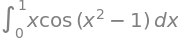

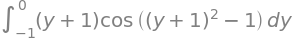

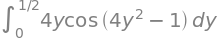

In [58]:
expr = Integral(x*cos(x**2 - 1), (x, 0, 1))
display(expr)
display(expr.transform(x-1, y))
display(expr.transform(x, y*2))

## 级数展开

`series(expr, x=None, x0=0, n=6, dir='+')`
- `expr` 表达式
- `x` 指定的变量
- `x0` 展开的位置
- `n` 展开的级数
- `dir` 展开的趋势，'+' 取 x->x0+，'-' 取 x->x0-

In [59]:
display(cos(x).series())
display(cos(x).series(x, x0=1, n=2))

`removeO` 去掉最后的余项

In [60]:
display(exp(sin(x)).series(x, 0, 4))
display(exp(sin(x)).series(x, 0, 4).removeO())

## 数值计算

在得到符号表达式后，可以使用 evalf 和 lambdify 进行数值计算

`evalf(n, sub=None, chop=False)`
- `n` 设置精度为n位
- `sub` 用数值代替符号，例如subs={x:3, y:1+pi}。这些替换必须作为字典给出。
- `chop` 指定如何将子结果中的微小实部或虚部替换为精确的零。当True时，chop值默认为标准精度。

还有更多其他参数详见 [sympy.core.evalf](https://docs.sympy.org/latest/modules/core.html?highlight=evalf#module-sympy.core.evalf)

In [61]:
expr = sqrt(8)
expr

In [62]:
display(expr.evalf())
display(expr.evalf(3))

In [63]:
expr = x + y**2
display(expr.evalf(subs={x:3.125}))
display(expr.evalf(4,subs={x:3.125, y:4}))

`lambdify(args, expr, modules=None)`
- `args` 作为函数变量的符号
- `expr` 转化成函数的表达式
- `modules` 用于数值计算的模块，包括 `numpy`, `math` 等

`lambdify` 将 SymPy 表达式转变为函数，传入变量后，可以指定 numpy/math 等库进行计算，数值计算的执行速度比 SymPy 原生方法要快很多

作用类似于 Python 原生的 `lambda` 函数，适合处理大量的数据，用 SymPy 定义函数，转换到 numpy 进行快速计算

In [64]:
import numpy
a = numpy.arange(10)
fx = x**2 + 2
fxy = x**2 + y

In [65]:
output_fx = lambdify(x, fx, "numpy")
display(output_fx(a))
output_fxy = lambdify([x,y], fxy, "numpy")
display(output_fxy(a, a))

array([ 2,  3,  6, 11, 18, 27, 38, 51, 66, 83])

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

# 方程

除了各种表达式、函数和计算，SymPy 还支持等式的判断和方程组的求解

`solve` 是通用的求解方法，会自动匹配需要求解的等式、方程组、矩阵等形式

如果确定了具体的求解类型，则建议根据需要选择单变量方程 `solveset`，线性方程组 `linsolve`，非线性方程组 `nonlinsolve`

In [66]:
x, y, z = symbols('x y z')

## 等式

判断 SymPy 中表达式的相等关系时，直接使用 == 达不到关系式的判断效果，需要使用 `Eq` 构造一个等式

`Eq(lhs, rhs=None, **options)`
- `lhs` 左关系式
- `rhs` 右关系式

如果没有指定右关系式，则默认右关系式为 0

当左右关系式可以简单地判断关系时，则返回 True 或者 Flase

当左右关系式不能直接判断时，可以通过 `simplify` 进行整理后，自动求解判断关系

In [67]:
display(Eq(x**2 + 1 + x + x, x**2 + 2*x + 1))
display(Eq((x+1)**2, x**2 + 2*x + 1))
display(simplify(Eq((x+1)**2, x**2 + 2*x + 1)))

True

True

In [68]:
display(Eq(cos(x)**2 + sin(x)**2, 1))
display(simplify(Eq(cos(x)**2 + sin(x)**2, 1)))

True

In [69]:
expr = cos(x)**2 + sin(x)**2
expr.equals(2)

False

## 求解模组

在 SymPy 中，`solvers` 和 `solveset` 是一新一旧的两个模组。其中 `solve` 函数是 `solvers` 中的核心

官方文档中指出 `solve` 函数有输出类型不一致、参数过多且复杂等问题

因此推荐使用 `solveset`，其优势包括 API 统一、支持输出无穷解集、清晰区分实数域和复数域等，更加强大

`solve(f, *symbols, **flags)`
- `f` 求解的等式或等式组（列表等可迭代类型）
- `symbols` 求解的变量或变量组，例如 solve(f, x, y) 或 solve(f, [x, y])
- `flags` 其他参数，参见：
https://docs.sympy.org/latest/modules/solvers/solvers.html#module-sympy.solvers

`solveset(equation, variable=None, domain=S.Complexes)`
- `equation` 求解的等式或者等式组
- `variables` 求解的变量或变量组
- `domain` 求解的域，默认为复数域，可以指定 Naturals, Integers, Reals, Complexes 等多种区域

下面简单演示二者的区别

In [70]:
display(solve(Eq(sin(x),0), x))
display(solveset(Eq(sin(x),0), x))

{2⋅n⋅π │ n ∊ ℤ} ∪ {2⋅n⋅π + π │ n ∊ ℤ}

In [71]:
display(solve(Eq(E**x,1), x))
display(solveset(Eq(E**x,1), x))
display(solveset(Eq(E**x,1), x, Reals))

{2⋅n⋅ⅈ⋅π │ n ∊ ℤ}

In [72]:
display(solveset(x - x, x, domain=S.Reals))
display(solveset(sin(x) - 1, x, domain=S.Reals))

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

## 线性方程

`linsolve` 求解线性方程组

如果有确定的数值解，则会返回对应的解。否则会返回变量之间的关系式

方程组可以用 [Eq1, Eq2, ...] 的方式来书写

注意 Eq 可以写成 Eq(lhs, rhs)，也可以写成 expr(默认=0) 的形式

变量组可以不加括号 x, y, z ，也可以加 [x, y, z] 也可以加 (x, y ,z)

In [73]:
Eqs = [Eq(3*x + 2*y - z, 1), 2*x - 2*y + 4*z + 2, - x + y/2 - z]
display(Eqs)
display(linsolve(Eqs, x, y, z))

In [74]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], [x, y, z])

## 非线性方程

`nonlinsolve` 求解非线性方程组

这里统一写成 Eqs = [Eq1(默认=0), Eq2(默认=0)] 的形式

In [75]:
Eqs = [x*y - 1, 4*x**2 + y**2 - 5]
display(Eqs)
display(nonlinsolve(Eqs, x, y))

In [76]:
Eqs = [exp(x) - sin(y), y**2 - 4]
display(Eqs)
display(nonlinsolve(Eqs, [x, y]))

{({ⅈ⋅(2⋅n⋅π + π) + log(sin(2)) │ n ∊ ℤ}, -2), ({2⋅n⋅ⅈ⋅π + log(sin(2)) │ n ∊ ℤ}
, 2)}

## 微分方程

`dsolve(eq, f(x))` 求解单个微分方程

In [77]:
f = symbols('f', cls = Function)
f_ = f(x).diff(x)
f_

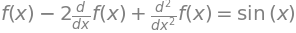

In [78]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

In [79]:
dsolve(diffeq, f(x))

除了上述类型，SymPy 还支持不等式、不定方程、微分方程组、偏微分方程、矩阵等更加复杂的方程类型

参见：https://docs.sympy.org/latest/modules/solvers/solveset.html?highlight=solveset#module-sympy.solvers.solveset

# 矩阵

## 基本操作

### 创建矩阵

`Matrix` 创建一个矩阵，使用 [[row1], [row2], ...] 的形式来书写

In [14]:
m = Matrix([[1, -1], [3, 4], [0, 2]])
m

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦

只填入一个 list 的情况下，会创建一个列向量

In [6]:
Matrix([1, 2, 3])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

### 矩阵形状

`shape` 得到矩阵的形状

In [9]:
shape(m)

### 矩阵的行和列

`col` 和 `row` 提取矩阵中的指定行或列

`col_del` 和 `row_del` 删除指定行或列，在原矩阵上操作

`col_insert` 和 `row_insert` 插入指定行或列，返回一个新的矩阵

In [11]:
display(m.row(0))
display(m.col(0))

[1  -1]

⎡1⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣0⎦

In [15]:
m.row_del(0)
display(m)

⎡3  4⎤
⎢    ⎥
⎣0  2⎦

In [17]:
m1 = m.col_insert(1, Matrix([1, 2]))
display(m)
display(m1)

⎡3  4⎤
⎢    ⎥
⎣0  2⎦

⎡3  1  4⎤
⎢       ⎥
⎣0  2  2⎦

## 特殊矩阵

### 单位阵

`eye(n)` 创建 n×n 的单位矩阵

In [2]:
eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

### 零矩阵

`zeros(n,m)` 创建 n×m 的零矩阵

In [4]:
zeros(2,3)

Matrix([
[0, 0, 0],
[0, 0, 0]])

### 全一矩阵

`ones(n,m)`创建 n×m 的全1矩阵

In [5]:
ones(2,3)

Matrix([
[1, 1, 1],
[1, 1, 1]])

### 对角阵

`diag(values)`创建对角阵

In [6]:
diag(1,2,3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

## 矩阵的基本运算

In [19]:
m = Matrix([[1, 3], [-2, 3]])
n = Matrix([[0, 3], [0, 7]])
display(m)
display(n)

⎡1   3⎤
⎢     ⎥
⎣-2  3⎦

⎡0  3⎤
⎢    ⎥
⎣0  7⎦

### 加、减、乘

`+/-/*` 矩阵的加减法、乘法，矩阵的维数需要符合规则

In [22]:
display(m + n)
display(m - n)
display(2 * m)
display(m * n)

⎡1   6 ⎤
⎢      ⎥
⎣-2  10⎦

⎡1   0 ⎤
⎢      ⎥
⎣-2  -4⎦

⎡2   6⎤
⎢     ⎥
⎣-4  6⎦

⎡0  24⎤
⎢     ⎥
⎣0  15⎦

### 转置

`m.T` 矩阵的转置，不需要加括号

In [25]:
m.T

⎡1  -2⎤
⎢     ⎥
⎣3  3 ⎦

### 逆和幂

`**` 矩阵的幂

`**-1` 矩阵的逆，前提是矩阵可逆

In [27]:
display(m**2)
display(m**-1)

⎡-5  12⎤
⎢      ⎥
⎣-8  3 ⎦

⎡1/3  -1/3⎤
⎢         ⎥
⎣2/9  1/9 ⎦

## 矩阵的其他计算

### 行列式

`det` 矩阵的行列式

In [81]:
m = Matrix([[1, 0 ,1], [2, -1 ,3], [4, 3 ,2]])
display(m)
display(m.det())

⎡1  0   1⎤
⎢        ⎥
⎢2  -1  3⎥
⎢        ⎥
⎣4  3   2⎦

### 最简式

`rref` 将矩阵转换为最简式

In [82]:
m = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
display(m)
display(m.rref())

⎡1   0   1   3 ⎤
⎢              ⎥
⎢2   3   4   7 ⎥
⎢              ⎥
⎣-1  -3  -3  -4⎦

⎛⎡1  0   1    3 ⎤        ⎞
⎜⎢              ⎥        ⎟
⎜⎢0  1  2/3  1/3⎥, (0, 1)⎟
⎜⎢              ⎥        ⎟
⎝⎣0  0   0    0 ⎦        ⎠

### 向量空间

`columnspace` 矩阵的列空间

`nullspace` 矩阵的零空间

In [83]:
m = Matrix([[1, 1, 2], [2, 1, 3], [3, 1, 4], [4, 1, 5]])
display(m)
display(m.columnspace())
display(m.nullspace())

⎡1  1  2⎤
⎢       ⎥
⎢2  1  3⎥
⎢       ⎥
⎢3  1  4⎥
⎢       ⎥
⎣4  1  5⎦

⎡⎡1⎤  ⎡1⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢1⎥⎥
⎢⎢ ⎥, ⎢ ⎥⎥
⎢⎢3⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣4⎦  ⎣1⎦⎦

⎡⎡-1⎤⎤
⎢⎢  ⎥⎥
⎢⎢-1⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

### 特征值和特征向量

`eigenvects` 矩阵的特征向量，格式为 [(特征值，向量数，[特征向量1, 特征向量2, ...]), ...]

`eigenvals` 矩阵的特征值，格式为 {特征值 : 向量数, ...}

In [28]:
m = Matrix([[3, -2,  4, -2], 
            [5,  3, -3, -2], 
            [5, -2,  2, -2], 
            [5, -2, -3,  3]])
display(m)
display(m.eigenvects())
display(m.eigenvals())

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

`charpoly` 获得特征多项式，效率更高

In [31]:
lamda = symbols('lamda')
p = m.charpoly(lamda)
display(p)
factor(p.as_expr())

### 对角化

`diagonalize` 对角化

In [85]:
P, D = m.diagonalize()
display(P)
display(D)
display(P*D*P**-1)

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

## 矩阵微积分

除了在矩阵中填入数字，还可以填入符号和表达式

In [5]:
m = Matrix([[x**2, x * y], [3 * x, 5]])
m

⎡ 2      ⎤
⎢x    x⋅y⎥
⎢        ⎥
⎣3⋅x   5 ⎦

`integrate`, `diff`, `limit` 等微积分的运算同样对矩阵适用，会对矩阵中的每一个元素进行操作

In [8]:
display(m.integrate((x, 0, 2)))
display(m.diff(x))
display(m.limit(x, 2))

⎡8/3  2⋅y⎤
⎢        ⎥
⎣ 6   10 ⎦

⎡2⋅x  y⎤
⎢      ⎥
⎣ 3   0⎦

⎡4  2⋅y⎤
⎢      ⎥
⎣6   5 ⎦

SymPy 还支持计算向量微积分中的 jacobi 矩阵、hessian 矩阵等

首先定义 $f(x,y)$ 和 $g(x,y)$ 并组成向量 $m = [f, g]$

In [32]:
f = 3 * x**2 * y
g = 2 * x + y**8
m = Matrix([f, g])
m

⎡    2   ⎤
⎢ 3⋅x ⋅y ⎥
⎢        ⎥
⎢       8⎥
⎣2⋅x + y ⎦

`jacobian(X)` 计算 jacobi 矩阵
- `X` 指定符号顺序的列表或矩阵形式

$
J = 
  \begin{bmatrix}
   \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
   \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
  \end{bmatrix}
$

In [31]:
n = Matrix([x, y])
m.jacobian(n)

⎡          2⎤
⎢6⋅x⋅y  3⋅x ⎥
⎢           ⎥
⎢          7⎥
⎣  2    8⋅y ⎦

除了指定符号矩阵以外，还可以借助 `free_symbols` 自动填入需要的符号顺序

In [35]:
display(m.free_symbols)
m.jacobian(list(m.free_symbols))

⎡          2⎤
⎢6⋅x⋅y  3⋅x ⎥
⎢           ⎥
⎢          7⎥
⎣  2    8⋅y ⎦

`hessian(f, varlist, constraints=())` 计算 hessian 矩阵
- `f` 进行求导的函数
- `varlist` 指定符号顺序的序列或向量形式
- `constraints` 约束条件

如果求导函数没有具体的形式，则会打印偏导的表达式

In [30]:
X = symbols('x0:2')
f = Function('f')(X[0], X[1])
hessian(f, (X[0], X[1]))

⎡   2                    2             ⎤
⎢  ∂                    ∂              ⎥
⎢ ────(f(x₀, x₁))    ───────(f(x₀, x₁))⎥
⎢    2               ∂x₁ ∂x₀           ⎥
⎢ ∂x₀                                  ⎥
⎢                                      ⎥
⎢    2                  2              ⎥
⎢   ∂                  ∂               ⎥
⎢───────(f(x₀, x₁))   ────(f(x₀, x₁))  ⎥
⎢∂x₁ ∂x₀                 2             ⎥
⎣                     ∂x₁              ⎦

# 函数图像

目前 SymPy 使用 matplotlib 作为后台渲染函数图像，因此使用方法与 matplotlib 基本保持一致

如果没有该库，程序会通过字符方式来进行画图

SymPy 支持 2D 的函数图像、参数函数、隐函数图像和 3D 的函数图像、线、平面

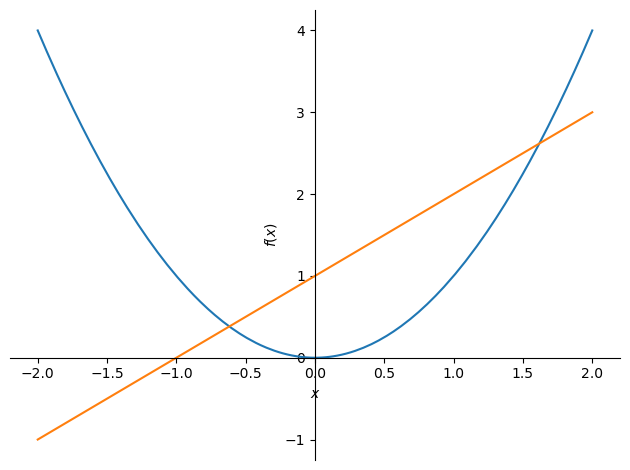

In [86]:
p1 = plot(x**2, (x, -2, 2), show = False)
p2 = plot(x + 1, (x, -2, 2), show = False)
p1.append(p2[0])
p1.show()

`plot_implicit` 使用等式创建隐函数

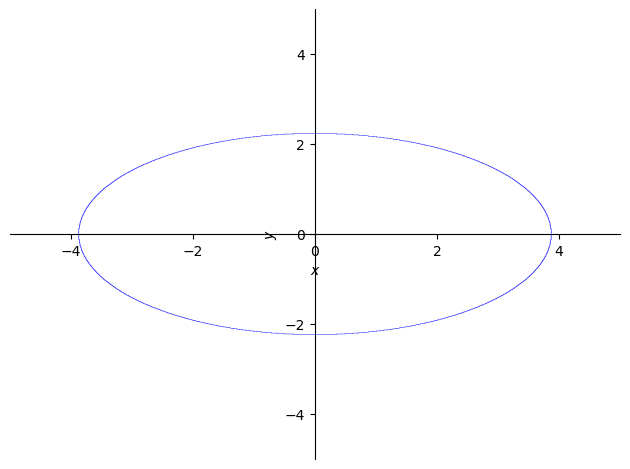

In [87]:
plot_implicit(Eq(x**2/3 + y**2, 5))